# TESS light curve analysis with `lightkurve`

In this notebook we will analyze TESS data for our planet-host stars with the goal of making a phase-folded exoplanet transit plot.  We will overlay this plot with our HPF transit spectroscopy measurements.  The two science goals are:  

- See if the HPF signals respond to the transit
- See if the HPF signals respond to the stellar rotation signal

In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

Let's start with HAT-P-67b.

In [3]:
sr = lk.search_lightcurve('HAT-P-67')

In [4]:
sr_2 = lk.search_targetpixelfile('HAT-P-67') #data cube: add up pixels in each picture

In [5]:
sr_2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,198588220,0.0
1,TESS Sector 24,2020,TESS-SPOC,1800,198588220,0.0
2,TESS Sector 26,2020,SPOC,120,198588220,0.0
3,TESS Sector 26,2020,TESS-SPOC,1800,198588220,0.0


In [6]:
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,198588220,0.0
1,TESS Sector 24,2020,TESS-SPOC,1800,198588220,0.0
2,TESS Sector 24,2020,QLP,1800,198588220,0.0
3,TESS Sector 26,2020,SPOC,120,198588220,0.0
4,TESS Sector 26,2020,TESS-SPOC,1800,198588220,0.0
5,TESS Sector 26,2020,QLP,1800,198588220,0.0


In [7]:
tpf_raw = sr_2[0].download() #use interact()

In [8]:
lc_raw = sr[1].download()

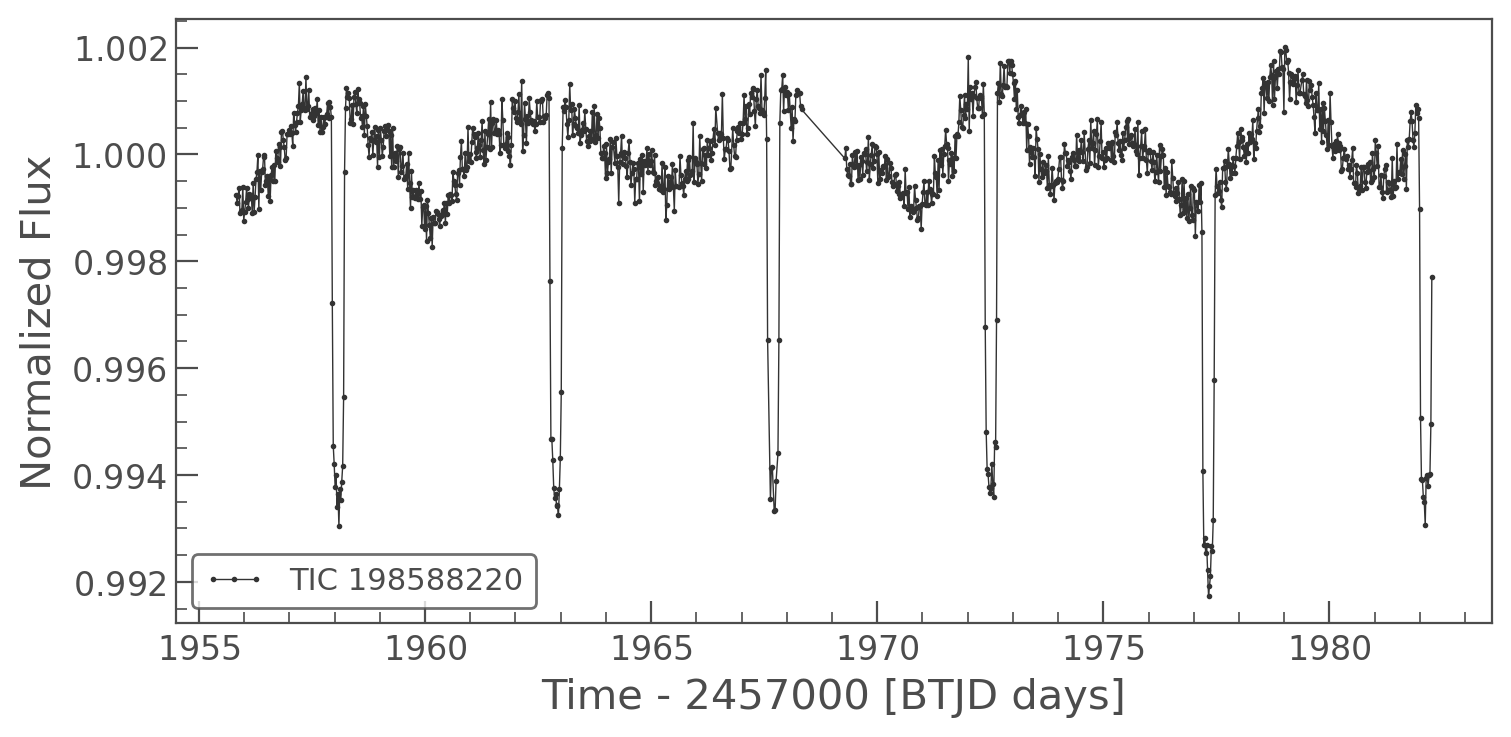

In [9]:
ax = lc_raw.normalize().plot(marker='.', linestyle=None)
#ax.set_ylim(0, 1.05)
plt.savefig('C:/Users/jojoa/GitHub/disperse/figures/HAT-P-67_TESS.png')

The star flux changes by about +/- 0.2%, and the exoplanet transit depth is about 0.7%.

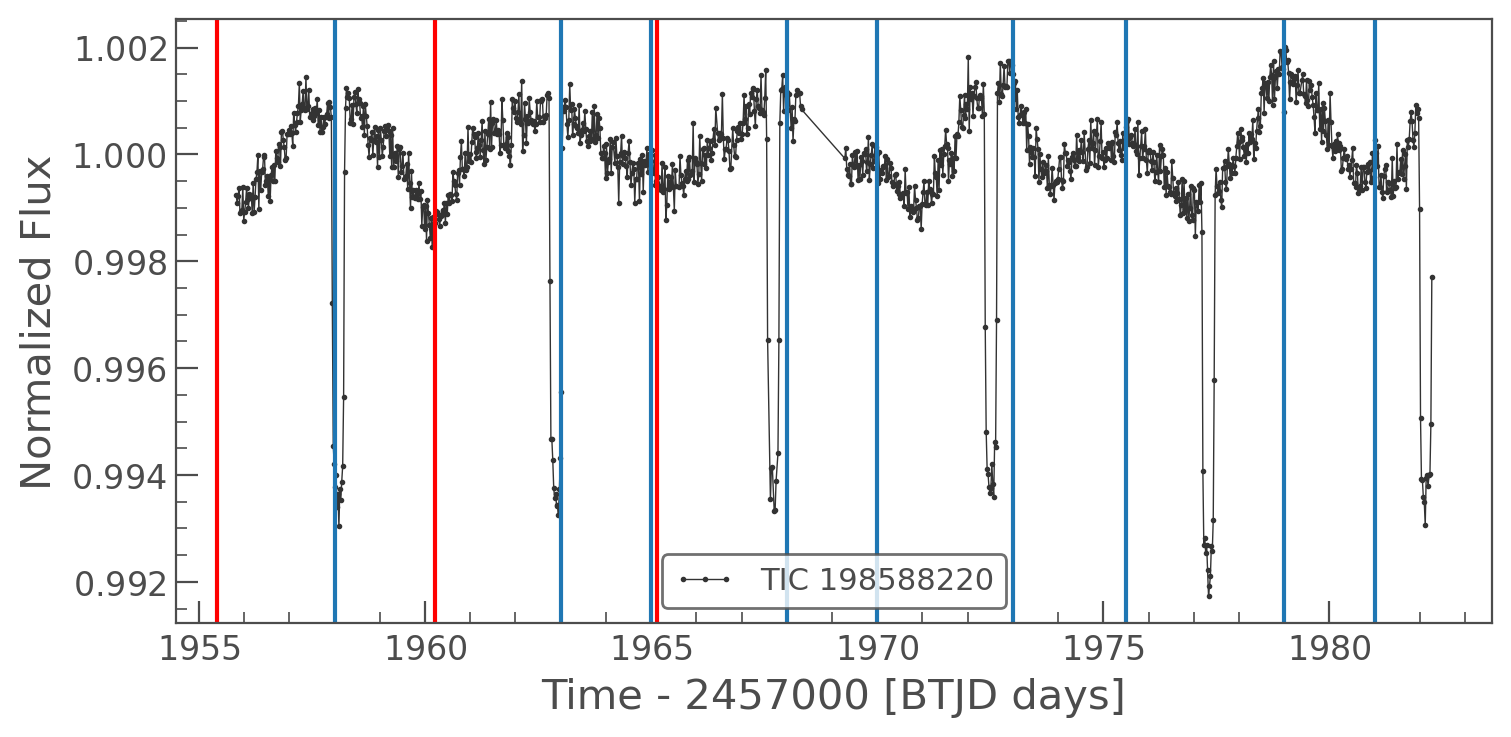

In [40]:
ax = lc_raw.normalize().plot(marker='.', linestyle=None)
ax.axvline(1958)
ax.axvline(1963)
ax.axvline(1965)
ax.axvline(1968)
ax.axvline(1970)
ax.axvline(1973)
ax.axvline(1975.5)
ax.axvline(1979)
ax.axvline(1981)
ax.axvline(1955.4,color='red')
ax.axvline(1960.21,color='red')
ax.axvline(1965.12,color='red')

In [19]:
rot_period = 5.417
planet_period = 4.81010250

The last transit on the right of the lightcurve shows what could be a very bright hot spot, where the flux increases by 0.2% from the baseline flux.